In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Загрузка данных
data = pd.read_csv('meteo_data.csv')
temperatures = data['HC_AIR_TEMPERATURE'].values

# Масштабирование данных
scaler = MinMaxScaler(feature_range=(0, 1))
temperatures_scaled = scaler.fit_transform(temperatures.reshape(-1, 1))

# Формирование обучающей и тестовой выборок
train_size = int(len(temperatures_scaled) * 0.8)
train, test = temperatures_scaled[:train_size], temperatures_scaled[train_size:]

# Создание обучающих наборов
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 3
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Ресайзинг данных для LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [4]:
# Создание модели LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

C:\Users\Счастливый Наиль\PycharmProjects\meteoApp\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
53/53 - 3s - 65ms/step - loss: 0.0973
Epoch 2/20
53/53 - 0s - 3ms/step - loss: 0.0415
Epoch 3/20
53/53 - 0s - 3ms/step - loss: 0.0372
Epoch 4/20
53/53 - 0s - 3ms/step - loss: 0.0340
Epoch 5/20
53/53 - 0s - 3ms/step - loss: 0.0398
Epoch 6/20
53/53 - 0s - 3ms/step - loss: 0.0314
Epoch 7/20
53/53 - 0s - 3ms/step - loss: 0.0338
Epoch 8/20
53/53 - 0s - 3ms/step - loss: 0.0347
Epoch 9/20
53/53 - 0s - 3ms/step - loss: 0.0311
Epoch 10/20
53/53 - 0s - 3ms/step - loss: 0.0302
Epoch 11/20
53/53 - 0s - 3ms/step - loss: 0.0265
Epoch 12/20
53/53 - 0s - 3ms/step - loss: 0.0294
Epoch 13/20
53/53 - 0s - 3ms/step - loss: 0.0255
Epoch 14/20
53/53 - 0s - 3ms/step - loss: 0.0268
Epoch 15/20
53/53 - 0s - 3ms/step - loss: 0.0235
Epoch 16/20
53/53 - 0s - 3ms/step - loss: 0.0237
Epoch 17/20
53/53 - 0s - 3ms/step - loss: 0.0211
Epoch 18/20
53/53 - 0s - 3ms/step - loss: 0.0200
Epoch 19/20
53/53 - 0s - 3ms/step - loss: 0.0199
Epoch 20/20
53/53 - 0s - 3ms/step - loss: 0.0170


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


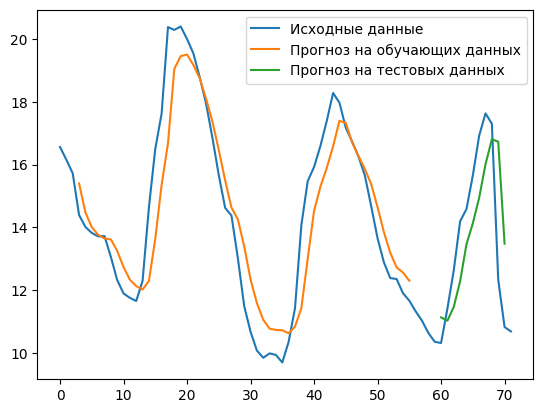

In [5]:
# Прогнозирование
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Возвращение данных в исходный масштаб
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Визуализация результатов
plt.plot(scaler.inverse_transform(temperatures_scaled), label='Исходные данные')
plt.plot(np.arange(look_back, look_back+len(train_predict)), train_predict, label='Прогноз на обучающих данных')
plt.plot(np.arange(len(train_predict)+(2*look_back)+1, len(temperatures_scaled)-1), test_predict, label='Прогноз на тестовых данных')
plt.legend()
plt.show()